<a href="https://colab.research.google.com/github/skyprince999/CAX-Mortgage-Propensity/blob/master/CAX_Mortage_LGB_and_XGBoost_v4_More_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a linear model with Estimators

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/estimators/linear"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/estimators/linear.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/estimators/linear.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from IPython.display import clear_output

Download the dataset:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

#'CAX_MortgageModeling_Train3.csv'
#os.listdir('/content/gdrive/My Drive')

PATH = '/content/gdrive/My Drive/'

train_file = PATH + 'CAX_MortgageModeling_Train3.csv'
test_file = PATH + 'CAX_MortgageModeling_Test2.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

train_df.head()

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,Refinance,Monthly,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,Refinance,Monthly,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED
2,CAX_Train_3,3,531000,2152,30.97,80.00,35.41,360,424800.0,3.5,Purchase,Monthly,Single Detached,6,M1N,35-39,Female,87000,2,72,709,FUNDED
3,CAX_Train_4,4,1200000,5410,19.04,75.00,34.14,360,960000.0,5.5,Purchase,Monthly,Single Detached,12,M2M,45-49,Male,300000,8,54,761,FUNDED
4,CAX_Train_5,5,350000,3342,29.59,80.00,34.85,360,592000.0,5.0,Refinance,Monthly,Single Detached,12,L7G,50-54,Male,147000,8,62,762,FUNDED


In [0]:
train_df.drop(['MORTGAGE_NUMBER'], axis=1, inplace = True)
test_df.drop(['MORTGAGE_NUMBER'], axis=1, inplace = True)

In [0]:
def tran_result(val):
  if val == 'FUNDED':
    return 1
  else:
    return 0

In [0]:
result = train_df['RESULT'].apply(lambda x: tran_result(x))

In [0]:
train_df.drop('RESULT', axis=1, inplace = True)

In [0]:
train_df.dtypes

Unique_ID             object
PROPERTY_VALUE         int64
MORTGAGE_PAYMENT       int64
GDS                  float64
LTV                  float64
TDS                  float64
AMORTIZATION           int64
MORTGAGE_AMOUNT      float64
RATE                 float64
MORTGAGE_PURPOSE      object
PAYMENT_FREQUENCY     object
PROPERTY_TYPE         object
TERM                   int64
FSA                   object
AGE_RANGE             object
GENDER                object
INCOME                 int64
INCOME_TYPE            int64
NAICS_CODE            object
CREDIT_SCORE           int64
dtype: object

In [0]:
test_df.isnull().sum()

Unique_ID            0
PROPERTY_VALUE       0
MORTGAGE_PAYMENT     0
GDS                  0
LTV                  0
TDS                  0
AMORTIZATION         0
MORTGAGE_AMOUNT      0
RATE                 0
MORTGAGE_PURPOSE     0
PAYMENT_FREQUENCY    0
PROPERTY_TYPE        0
TERM                 0
FSA                  0
AGE_RANGE            0
GENDER               0
INCOME               0
INCOME_TYPE          0
NAICS_CODE           0
CREDIT_SCORE         0
dtype: int64

In [0]:
train_df.columns

Index(['Unique_ID', 'PROPERTY_VALUE', 'MORTGAGE_PAYMENT', 'GDS', 'LTV', 'TDS',
       'AMORTIZATION', 'MORTGAGE_AMOUNT', 'RATE', 'MORTGAGE_PURPOSE',
       'PAYMENT_FREQUENCY', 'PROPERTY_TYPE', 'TERM', 'FSA', 'AGE_RANGE',
       'GENDER', 'INCOME', 'INCOME_TYPE', 'NAICS_CODE', 'CREDIT_SCORE'],
      dtype='object')

In [0]:
temp_df = train_df.append(test_df)
print(temp_df.shape)
print(train_df.shape)
print(test_df.shape)

(60855, 20)
(45641, 20)
(15214, 20)


In [0]:
mortgage_purpose_ohe = pd.get_dummies(temp_df['MORTGAGE_PURPOSE'])
payment_frequency_ohe = pd.get_dummies(temp_df['PAYMENT_FREQUENCY'])
property_type_ohe = pd.get_dummies(temp_df['PROPERTY_TYPE'])
term_ohe = pd.get_dummies(temp_df['TERM'])
fsa_ohe = pd.get_dummies(temp_df['FSA'])
age_range_ohe = pd.get_dummies(temp_df['AGE_RANGE'])
gender_ohe = pd.get_dummies(temp_df['GENDER'])
income_type_ohe = pd.get_dummies(temp_df['INCOME_TYPE'])
naics_code_ohe = pd.get_dummies(temp_df['NAICS_CODE'])


In [0]:
mortgage_purpose_ohe.columns = ['MORTGAGE_PURPOSE_'+str(col) for col in mortgage_purpose_ohe.columns]
payment_frequency_ohe.columns = ['PAYMENT_FREQUENCY_'+str(col) for col in payment_frequency_ohe.columns]
property_type_ohe.columns = ['PROPERTY_TYPE_'+str(col) for col in property_type_ohe.columns]
term_ohe.columns = ['TERM_'+str(col) for col in term_ohe.columns]
fsa_ohe.columns = ['FSA_'+str(col) for col in fsa_ohe.columns]
age_range_ohe.columns = ['AGE_RANGE_'+str(col) for col in age_range_ohe.columns]
gender_ohe.columns = ['GENDER_'+str(col) for col in gender_ohe.columns]
income_type_ohe.columns = ['INCOME_TYPE_'+str(col) for col in income_type_ohe.columns]
naics_code_ohe.columns = ['NAICS_CODE_'+str(col) for col in naics_code_ohe.columns]

In [0]:
temp_df['PROPERTY_VALUE'] = temp_df['PROPERTY_VALUE'].apply(lambda x: np.log(x + 1))
temp_df['MORTGAGE_PAYMENT'] = temp_df['MORTGAGE_PAYMENT'].apply(lambda x: np.log(x + 1))
temp_df['INCOME'] = temp_df['INCOME'].apply(lambda x: np.log(x + 1))

In [0]:
tempDF = pd.concat([temp_df, mortgage_purpose_ohe, payment_frequency_ohe, property_type_ohe, term_ohe,fsa_ohe, age_range_ohe, gender_ohe, 
               income_type_ohe, naics_code_ohe], axis=1)

In [0]:
tempDF.head()

,Unique_ID,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,MORTGAGE_PURPOSE_Purchase,MORTGAGE_PURPOSE_Refinance,PAYMENT_FREQUENCY_Bi-Weekly,PAYMENT_FREQUENCY_Bi-Weekly Accelerated,PAYMENT_FREQUENCY_Monthly,PAYMENT_FREQUENCY_Semi-Monthly,PAYMENT_FREQUENCY_Weekly,PAYMENT_FREQUENCY_Weekly Accelerated,PROPERTY_TYPE_Duplex,PROPERTY_TYPE_Fourplex,PROPERTY_TYPE_High Rise,PROPERTY_TYPE_Semi-Detached,PROPERTY_TYPE_Single Detached,PROPERTY_TYPE_Townhouse Condominium,PROPERTY_TYPE_Townhouse Freehold,PROPERTY_TYPE_Triplex,TERM_6,TERM_12,TERM_24,TERM_36,...,INCOME_TYPE_-1,INCOME_TYPE_1,INCOME_TYPE_2,INCOME_TYPE_3,INCOME_TYPE_4,INCOME_TYPE_5,INCOME_TYPE_6,INCOME_TYPE_7,INCOME_TYPE_8,INCOME_TYPE_9,INCOME_TYPE_10,INCOME_TYPE_11,INCOME_TYPE_12,INCOME_TYPE_13,INCOME_TYPE_14,INCOME_TYPE_15,INCOME_TYPE_16,INCOME_TYPE_17,INCOME_TYPE_18,INCOME_TYPE_19,INCOME_TYPE_20,NAICS_CODE_11,NAICS_CODE_22,NAICS_CODE_23,NAICS_CODE_31-33,NAICS_CODE_42,NAICS_CODE_44-45,NAICS_CODE_48-49,NAICS_CODE_51,NAICS_CODE_52,NAICS_CODE_53,NAICS_CODE_54,NAICS_CODE_55,NAICS_CODE_56,NAICS_CODE_61,NAICS_CODE_62,NAICS_CODE_71,NAICS_CODE_72,NAICS_CODE_81,NAICS_CODE_92
0,CAX_Train_1,13.710151,8.599694,61.98,65.00,71.63,360,1040000.0,4.0,Refinance,Monthly,Single Detached,12,L4C,Under 25,Male,11.589896,8,44-45,681,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CAX_Train_2,12.863595,7.687080,35.22,74.29,40.65,360,390000.0,4.5,Refinance,Monthly,Single Detached,12,L9T,70 and over,Male,11.264477,2,56,710,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,CAX_Train_3,13.182519,7.674617,30.97,80.00,35.41,360,424800.0,3.5,Purchase,Monthly,Single Detached,6,M1N,35-39,Female,11.373675,2,72,709,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,CAX_Train_4,13.997833,8.596189,19.04,75.00,34.14,360,960000.0,5.5,Purchase,Monthly,Single Detached,12,M2M,45-49,Male,12.611541,8,54,761,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,CAX_Train_5,12.765691,8.114624,29.59,80.00,34.85,360,592000.0,5.0,Refinance,Monthly,Single Detached,12,L7G,50-54,Male,11.898195,8,62,762,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Read saved values of aggregated functions for each of the columns

In [0]:
aggDF = pd.read_csv(PATH + 'CAX_AggregatedFunctions.csv')
aggDF.head()

,Unique_ID,PROPERTY_VALUE_mean,PROPERTY_VALUE_sum,PROPERTY_VALUE_min,PROPERTY_VALUE_max,PROPERTY_VALUE_median,PROPERTY_VALUE_quantile,PROPERTY_VALUE_mad,PROPERTY_VALUE_std,MORTGAGE_PAYMENT_mean,MORTGAGE_PAYMENT_sum,MORTGAGE_PAYMENT_min,MORTGAGE_PAYMENT_max,MORTGAGE_PAYMENT_median,MORTGAGE_PAYMENT_quantile,MORTGAGE_PAYMENT_mad,MORTGAGE_PAYMENT_std,GDS_mean,GDS_sum,GDS_min,GDS_max,GDS_median,GDS_quantile,GDS_mad,GDS_std,LTV_mean,LTV_sum,LTV_min,LTV_max,LTV_median,LTV_quantile,LTV_mad,LTV_std,TDS_mean,TDS_sum,TDS_min,TDS_max,TDS_median,TDS_quantile,TDS_mad,...,AGE_RANGE_sum,AGE_RANGE_mean,AGE_RANGE_count,AGE_RANGE_nunique,AGE_RANGE_min,AGE_RANGE_max,GENDER_sum,GENDER_mean,GENDER_count,GENDER_nunique,GENDER_min,GENDER_max,INCOME_mean,INCOME_sum,INCOME_min,INCOME_max,INCOME_median,INCOME_quantile,INCOME_mad,INCOME_std,INCOME_TYPE_sum,INCOME_TYPE_mean,INCOME_TYPE_count,INCOME_TYPE_nunique,INCOME_TYPE_min,INCOME_TYPE_max,NAICS_CODE_sum,NAICS_CODE_mean,NAICS_CODE_count,NAICS_CODE_nunique,NAICS_CODE_min,NAICS_CODE_max,CREDIT_SCORE_mean,CREDIT_SCORE_sum,CREDIT_SCORE_min,CREDIT_SCORE_max,CREDIT_SCORE_median,CREDIT_SCORE_quantile,CREDIT_SCORE_mad,CREDIT_SCORE_std
0,CAX_Test_1,12.971543,12.971543,12.971543,12.971543,12.971543,12.971543,0.0,NaN,7.529406,7.529406,7.529406,7.529406,7.529406,7.529406,0.0,NaN,34.51,34.51,34.51,34.51,34.51,34.51,0.0,NaN,75.00,75.00,75.00,75.00,75.00,75.00,0.0,NaN,35.60,35.60,35.60,35.60,35.60,35.60,0.0,...,4,4,1,1,4,4,1,1,1,1,1,1,11.238502,11.238502,11.238502,11.238502,11.238502,11.238502,0.0,NaN,8,8,1,1,8,8,2,2,1,1,2,2,834,834,834,834,834,834.0,0.0,NaN
1,CAX_Test_10,12.866183,12.866183,12.866183,12.866183,12.866183,12.866183,0.0,NaN,7.416378,7.416378,7.416378,7.416378,7.416378,7.416378,0.0,NaN,1.50,1.50,1.50,1.50,1.50,1.50,0.0,NaN,75.00,75.00,75.00,75.00,75.00,75.00,0.0,NaN,43.51,43.51,43.51,43.51,43.51,43.51,0.0,...,5,5,1,1,5,5,2,2,1,1,2,2,11.759793,11.759793,11.759793,11.759793,11.759793,11.759793,0.0,NaN,8,8,1,1,8,8,12,12,1,1,12,12,715,715,715,715,715,715.0,0.0,NaN
2,CAX_Test_100,12.676079,12.676079,12.676079,12.676079,12.676079,12.676079,0.0,NaN,7.256297,7.256297,7.256297,7.256297,7.256297,7.256297,0.0,NaN,31.80,31.80,31.80,31.80,31.80,31.80,0.0,NaN,65.00,65.00,65.00,65.00,65.00,65.00,0.0,NaN,32.03,32.03,32.03,32.03,32.03,32.03,0.0,...,5,5,1,1,5,5,1,1,1,1,1,1,10.950824,10.950824,10.950824,10.950824,10.950824,10.950824,0.0,NaN,2,2,1,1,2,2,10,10,1,1,10,10,610,610,610,610,610,610.0,0.0,NaN
3,CAX_Test_1000,13.151924,13.151924,13.151924,13.151924,13.151924,13.151924,0.0,NaN,7.889834,7.889834,7.889834,7.889834,7.889834,7.889834,0.0,NaN,29.27,29.27,29.27,29.27,29.27,29.27,0.0,NaN,67.95,67.95,67.95,67.95,67.95,67.95,0.0,NaN,40.16,40.16,40.16,40.16,40.16,40.16,0.0,...,6,6,1,1,6,6,0,0,1,1,0,0,11.652696,11.652696,11.652696,11.652696,11.652696,11.652696,0.0,NaN,8,8,1,1,8,8,12,12,1,1,12,12,634,634,634,634,634,634.0,0.0,NaN
4,CAX_Test_10000,13.592368,13.592368,13.592368,13.592368,13.592368,13.592368,0.0,NaN,7.969358,7.969358,7.969358,7.969358,7.969358,7.969358,0.0,NaN,31.58,31.58,31.58,31.58,31.58,31.58,0.0,NaN,73.68,73.68,73.68,73.68,73.68,73.68,0.0,NaN,39.44,39.44,39.44,39.44,39.44,39.44,0.0,...,4,4,1,1,4,4,0,0,1,1,0,0,11.661354,11.661354,11.661354,11.661354,11.661354,11.661354,0.0,NaN,2,2,1,1,2,2,12,12,1,1,12,12,775,775,775,775,775,775.0,0.0,NaN


In [0]:
temp_df = tempDF.merge(aggDF, on = ['Unique_ID'])
temp_df.shape

(60855, 1387)

In [0]:
trainDF = train_df[['Unique_ID']].merge(temp_df, on = ['Unique_ID'])
testDF = test_df[['Unique_ID']].merge(temp_df, on = ['Unique_ID'])

In [0]:
print(trainDF.shape)
print(testDF.shape)

(45641, 1387)
(15214, 1387)


In [0]:
trainDF.head()

,Unique_ID,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,MORTGAGE_PURPOSE,PAYMENT_FREQUENCY,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,MORTGAGE_PURPOSE_Purchase,MORTGAGE_PURPOSE_Refinance,PAYMENT_FREQUENCY_Bi-Weekly,PAYMENT_FREQUENCY_Bi-Weekly Accelerated,PAYMENT_FREQUENCY_Monthly,PAYMENT_FREQUENCY_Semi-Monthly,PAYMENT_FREQUENCY_Weekly,PAYMENT_FREQUENCY_Weekly Accelerated,PROPERTY_TYPE_Duplex,PROPERTY_TYPE_Fourplex,PROPERTY_TYPE_High Rise,PROPERTY_TYPE_Semi-Detached,PROPERTY_TYPE_Single Detached,PROPERTY_TYPE_Townhouse Condominium,PROPERTY_TYPE_Townhouse Freehold,PROPERTY_TYPE_Triplex,TERM_6,TERM_12,TERM_24,TERM_36,...,AGE_RANGE_sum,AGE_RANGE_mean,AGE_RANGE_count,AGE_RANGE_nunique,AGE_RANGE_min,AGE_RANGE_max,GENDER_sum,GENDER_mean,GENDER_count,GENDER_nunique,GENDER_min,GENDER_max,INCOME_mean,INCOME_sum,INCOME_min,INCOME_max,INCOME_median,INCOME_quantile,INCOME_mad,INCOME_std,INCOME_TYPE_sum,INCOME_TYPE_mean,INCOME_TYPE_count,INCOME_TYPE_nunique,INCOME_TYPE_min,INCOME_TYPE_max,NAICS_CODE_sum,NAICS_CODE_mean,NAICS_CODE_count,NAICS_CODE_nunique,NAICS_CODE_min,NAICS_CODE_max,CREDIT_SCORE_mean,CREDIT_SCORE_sum,CREDIT_SCORE_min,CREDIT_SCORE_max,CREDIT_SCORE_median,CREDIT_SCORE_quantile,CREDIT_SCORE_mad,CREDIT_SCORE_std
0,CAX_Train_1,13.710151,8.599694,61.98,65.00,71.63,360,1040000.0,4.0,Refinance,Monthly,Single Detached,12,L4C,Under 25,Male,11.589896,8,44-45,681,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,10,10,1,1,10,10,1,1,1,1,1,1,11.589896,11.589896,11.589896,11.589896,11.589896,11.589896,0.0,NaN,8,8,1,1,8,8,5,5,1,1,5,5,681,681,681,681,681,681.0,0.0,NaN
1,CAX_Train_2,12.863595,7.687080,35.22,74.29,40.65,360,390000.0,4.5,Refinance,Monthly,Single Detached,12,L9T,70 and over,Male,11.264477,2,56,710,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,9,9,1,1,9,9,1,1,1,1,1,1,11.264477,11.264477,11.264477,11.264477,11.264477,11.264477,0.0,NaN,2,2,1,1,2,2,12,12,1,1,12,12,710,710,710,710,710,710.0,0.0,NaN
2,CAX_Train_3,13.182519,7.674617,30.97,80.00,35.41,360,424800.0,3.5,Purchase,Monthly,Single Detached,6,M1N,35-39,Female,11.373675,2,72,709,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,2,2,1,1,2,2,0,0,1,1,0,0,11.373675,11.373675,11.373675,11.373675,11.373675,11.373675,0.0,NaN,2,2,1,1,2,2,16,16,1,1,16,16,709,709,709,709,709,709.0,0.0,NaN
3,CAX_Train_4,13.997833,8.596189,19.04,75.00,34.14,360,960000.0,5.5,Purchase,Monthly,Single Detached,12,M2M,45-49,Male,12.611541,8,54,761,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,4,4,1,1,4,4,1,1,1,1,1,1,12.611541,12.611541,12.611541,12.611541,12.611541,12.611541,0.0,NaN,8,8,1,1,8,8,10,10,1,1,10,10,761,761,761,761,761,761.0,0.0,NaN
4,CAX_Train_5,12.765691,8.114624,29.59,80.00,34.85,360,592000.0,5.0,Refinance,Monthly,Single Detached,12,L7G,50-54,Male,11.898195,8,62,762,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,5,5,1,1,5,5,1,1,1,1,1,1,11.898195,11.898195,11.898195,11.898195,11.898195,11.898195,0.0,NaN,8,8,1,1,8,8,14,14,1,1,14,14,762,762,762,762,762,762.0,0.0,NaN


In [0]:
trainDF.fillna(0, inplace = True)
testDF.fillna(0, inplace = True)

In [0]:
cat_columns = ['Unique_ID', 'MORTGAGE_PURPOSE','PAYMENT_FREQUENCY', 'PROPERTY_TYPE', 'TERM', 'FSA', 'AGE_RANGE', 'GENDER', 'INCOME_TYPE', 'NAICS_CODE']
features = list()

for col in temp_df.columns:
  if col not in cat_columns:
    features.append(col)

In [0]:
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

In [0]:
trainDF.drop('Unique_ID', axis=1, inplace = True)

KeyError: ignored

In [0]:
X_train, X_val, y_train, y_val = train_test_split(trainDF[features], result, test_size = 0.25, random_state= 1234)

In [0]:
y_val.values


array([0, 1, 1, ..., 1, 1, 1])

In [0]:
lgbModel1 = LGBMClassifier(n_estimators = 1500, random_state = 23498)

lgbModel1.fit(X_train, y_train, eval_set = [(X_val, y_val.values)], eval_metric='auc', verbose = 50)

[50]	valid_0's auc: 0.697193	valid_0's binary_logloss: 0.45945
[100]	valid_0's auc: 0.703249	valid_0's binary_logloss: 0.456426
[150]	valid_0's auc: 0.703044	valid_0's binary_logloss: 0.456676
[200]	valid_0's auc: 0.701628	valid_0's binary_logloss: 0.457597
[250]	valid_0's auc: 0.700418	valid_0's binary_logloss: 0.45867
[300]	valid_0's auc: 0.699043	valid_0's binary_logloss: 0.460104
[350]	valid_0's auc: 0.6983	valid_0's binary_logloss: 0.461168
[400]	valid_0's auc: 0.696169	valid_0's binary_logloss: 0.463009
[450]	valid_0's auc: 0.696044	valid_0's binary_logloss: 0.464259
[500]	valid_0's auc: 0.695223	valid_0's binary_logloss: 0.465524
[550]	valid_0's auc: 0.694253	valid_0's binary_logloss: 0.46757
[600]	valid_0's auc: 0.694005	valid_0's binary_logloss: 0.468961
[650]	valid_0's auc: 0.692349	valid_0's binary_logloss: 0.471147
[700]	valid_0's auc: 0.691807	valid_0's binary_logloss: 0.472751
[750]	valid_0's auc: 0.691352	valid_0's binary_logloss: 0.474219
[800]	valid_0's auc: 0.689758	v

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1500, n_jobs=-1, num_leaves=31, objective=None,
        random_state=23498, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
sorted(zip(lgbModel1.feature_importances_, X_train), reverse= True)

[(4271, 'CREDIT_SCORE'),
 (3932, 'GDS'),
 (3929, 'TDS'),
 (3518, 'INCOME'),
 (3459, 'FSA_mean'),
 (3205, 'MORTGAGE_PAYMENT'),
 (3031, 'MORTGAGE_AMOUNT'),
 (3004, 'PROPERTY_VALUE'),
 (2426, 'LTV'),
 (1557, 'RATE'),
 (1408, 'NAICS_CODE_sum'),
 (1240, 'AGE_RANGE_sum'),
 (414, 'INCOME_TYPE_sum'),
 (376, 'GENDER_Male'),
 (313, 'PROPERTY_TYPE_sum'),
 (263, 'MORTGAGE_PURPOSE_Purchase'),
 (222, 'PROPERTY_TYPE_Single Detached'),
 (214, 'GENDER_Female'),
 (206, 'NAICS_CODE_56'),
 (176, 'AGE_RANGE_40-44'),
 (167, 'TERM_sum'),
 (162, 'INCOME_TYPE_2'),
 (159, 'INCOME_TYPE_8'),
 (156, 'AMORTIZATION'),
 (155, 'AGE_RANGE_45-49'),
 (146, 'GENDER_Unknown'),
 (131, 'TERM_12'),
 (127, 'AGE_RANGE_50-54'),
 (120, 'NAICS_CODE_54'),
 (118, 'GENDER_sum'),
 (116, 'AGE_RANGE_35-39'),
 (114, 'AGE_RANGE_55-59'),
 (98, 'TERM_24'),
 (98, 'MORTGAGE_PURPOSE_Refinance'),
 (90, 'PROPERTY_TYPE_Semi-Detached'),
 (86, 'NAICS_CODE_55'),
 (85, 'PAYMENT_FREQUENCY_Monthly'),
 (84, 'PROPERTY_TYPE_High Rise'),
 (80, 'PROPERTY_TY

In [0]:
preds = lgbModel1.predict_proba(testDF[features])[:,-1]

In [0]:
test_df['RESULT_prob'] = preds

In [0]:
test_df['Result_Predicted'] = test_df['RESULT_prob'].apply(lambda x: 'FUNDED' if x >0.5 else 'NOT FUNDED')

In [0]:
test_df['Result_Predicted'].value_counts()

FUNDED        14004
NOT FUNDED     1210
Name: Result_Predicted, dtype: int64

In [0]:
test_df[['Unique_ID', 'Result_Predicted']].to_csv(PATH+ 'submission_LGBM_f1_21May2019_0226.csv', index=False)

In [0]:
import seaborn as sns

In [0]:
trainDF['RESULTS'] = result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


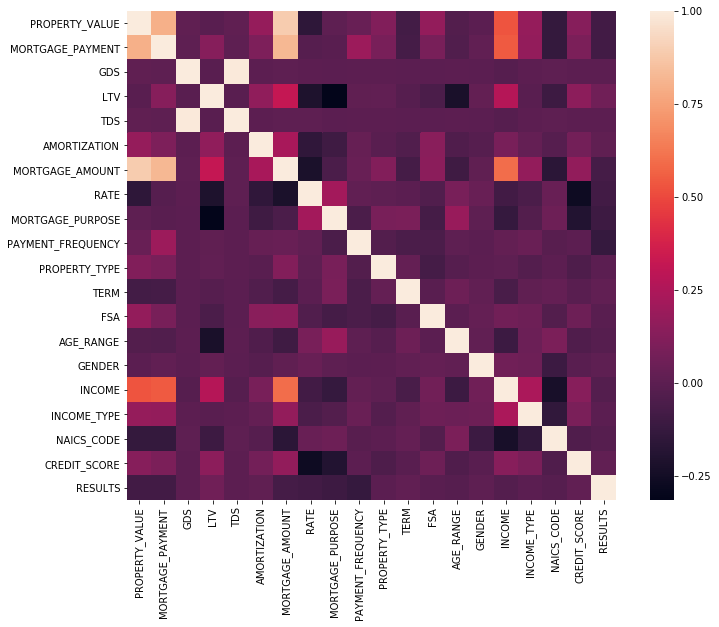

In [0]:
corrmat = trainDF.corr()
f, ax = plt.subplots(figsize = (12, 9))

sns.heatmap(corrmat, square = True)

In [0]:
corrmat['RESULTS'].sort_values()

PAYMENT_FREQUENCY   -0.127070
MORTGAGE_PURPOSE    -0.101611
MORTGAGE_PAYMENT    -0.088358
PROPERTY_VALUE      -0.086409
RATE                -0.083922
MORTGAGE_AMOUNT     -0.076000
INCOME              -0.027105
NAICS_CODE          -0.020321
AGE_RANGE           -0.017201
FSA                 -0.007536
PROPERTY_TYPE       -0.002572
INCOME_TYPE         -0.002078
GDS                  0.002933
TDS                  0.003000
GENDER               0.006941
AMORTIZATION         0.013248
CREDIT_SCORE         0.014828
TERM                 0.016327
LTV                  0.063309
RESULTS              1.000000
Name: RESULTS, dtype: float64

In [0]:
import xgboost as xgb

In [0]:
xgbModel1 = xgb.XGBClassifier(n_estimators = 1200, n_jobs = -1, max_depth = 8, learning_rate=0.01, colsample_bytree=0.8, subsample=1.0, verbose=True)
xgbModel1.fit(trainDF[features], result)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0, verbose=True)

In [0]:
pred = xgbModel1.predict_proba(testDF[features])

In [0]:
predDF = pd.DataFrame(pred)

In [0]:
predDF.columns = ['NOT FUNDED', 'FUNDED']

In [0]:
predDF['Result_Predicted'] = predDF['FUNDED'].apply(lambda x: 'FUNDED' if x>0.5 else 'NOT FUNDED' )
predDF.head(10)

,NOT FUNDED,FUNDED,Result_Predicted
0,0.195609,0.804391,FUNDED
1,0.000943,0.999057,FUNDED
2,0.001114,0.998886,FUNDED
3,0.106527,0.893473,FUNDED
4,0.186979,0.813021,FUNDED
5,0.371352,0.628648,FUNDED
6,0.451512,0.548488,FUNDED
7,0.112736,0.887264,FUNDED
8,0.132652,0.867348,FUNDED
9,0.087684,0.912316,FUNDED


In [0]:
predDF['Result_Predicted'].value_counts()

FUNDED        14715
NOT FUNDED      499
Name: Result_Predicted, dtype: int64

In [0]:
test_df['Result_Predicted'] = predDF['Result_Predicted']

In [0]:
test_df[['Unique_ID', 'Result_Predicted']].to_csv(PATH + 'submission_XGB_21May2019_0227.csv', index=False)

## Selecting and Engineering Features for the Model

Estimators use a system called [feature columns](https://www.tensorflow.org/guide/feature_columns) to describe how the model should interpret each of the raw input features. An Estimator expects a vector of numeric inputs, and feature columns describe how the model should convert each feature.

Selecting and crafting the right set of feature columns is key to learning an effective model. A *feature column* can be either one of the raw inputs in the original features `dict` (a *base feature column*), or any new columns created using transformations defined over one or multiple base columns (a *derived feature columns*).

A feature column is an abstract concept of any raw or derived variable that can be used to predict the target label.

-]
"}"]F12DSRSS
'SY055555555555555555555555555555555	ure Columns

#### Numeric columns

The simplest `feature_column` is `numeric_column`. This indicates that a feature is a numeric value that should be input to the model directly. For example:

In [0]:
age = fc.numeric_column('age')

The model will use the `feature_column` definitions to build the model input. You can inspect the resulting output using the `input_layer` function:

In [0]:
fc.input_layer(feature_batch, [age]).numpy()

The following will train and evaluate a model using only the `age` feature:

In [0]:
classifier = tf.estimator.LinearClassifier(feature_columns=[age])
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()  # used for display in notebook
print(result)

Similarly, we can define a `NumericColumn` for each continuous feature column
that we want to use in the model:

In [0]:
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns = [age,education_num, capital_gain, capital_loss, hours_per_week]

fc.input_layer(feature_batch, my_numeric_columns).numpy()

You could retrain a model on these features by changing the `feature_columns` argument to the constructor:

In [0]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
classifier.train(train_inpf)

result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %s' % (key, value))

#### Categorical columns

To define a feature column for a categorical feature, create a `CategoricalColumn` using one of the `tf.feature_column.categorical_column*` functions.

If you know the set of all possible feature values of a column—and there are only a few of them—use `categorical_column_with_vocabulary_list`. Each key in the list is assigned an auto-incremented ID starting from 0. For example, for the `relationship` column we can assign the feature string `Husband` to an integer ID of 0 and "Not-in-family" to 1, etc.

In [0]:
relationship = fc.categorical_column_with_vocabulary_list(
    'relationship',
    ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'])

This creates a sparse one-hot vector from the raw input feature.

The `input_layer` function we're using is designed for DNN models and expects dense inputs. To demonstrate the categorical column we must wrap it in a `tf.feature_column.indicator_column` to create the dense one-hot output (Linear `Estimators` can often skip this dense-step).

Note: the other sparse-to-dense option is `tf.feature_column.embedding_column`.

Run the input layer, configured with both the `age` and `relationship` columns:

In [0]:
fc.input_layer(feature_batch, [age, fc.indicator_column(relationship)])

If we don't know the set of possible values in advance, use the `categorical_column_with_hash_bucket` instead:

In [0]:
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation', hash_bucket_size=1000)

Here, each possible value in the feature column `occupation` is hashed to an integer ID as we encounter them in training. The example batch has a few different occupations:

In [0]:
for item in feature_batch['occupation'].numpy():
    print(item.decode())

If we run `input_layer` with the hashed column, we see that the output shape is `(batch_size, hash_bucket_size)`:

In [0]:
occupation_result = fc.input_layer(feature_batch, [fc.indicator_column(occupation)])

occupation_result.numpy().shape

It's easier to see the actual results if we take the `tf.argmax` over the `hash_bucket_size` dimension. Notice how any duplicate occupations are mapped to the same pseudo-random index:

In [0]:
tf.argmax(occupation_result, axis=1).numpy()

Note: Hash collisions are unavoidable, but often have minimal impact on model quiality. The effect may be noticable if the hash buckets are being used to compress the input space. See [this notebook](https://colab.research.google.com/github/tensorflow/models/blob/master/samples/outreach/blogs/housing_prices.ipynb) for a more visual example of the effect of these hash collisions.

No matter how we choose to define a `SparseColumn`, each feature string is mapped into an integer ID by looking up a fixed mapping or by hashing. Under the hood, the `LinearModel` class is responsible for managing the mapping and creating `tf.Variable` to store the model parameters (model *weights*) for each feature ID. The model parameters are learned through the model training process described later.

Let's do the similar trick to define the other categorical features:

In [0]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education', [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status', [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass', [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])


my_categorical_columns = [relationship, occupation, education, marital_status, workclass]

It's easy to use both sets of columns to configure a model that uses all these features:

In [0]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns+my_categorical_columns)
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()

for key,value in sorted(result.items()):
  print('%s: %s' % (key, value))

### Derived feature columns

#### Make Continuous Features Categorical through Bucketization

Sometimes the relationship between a continuous feature and the label is not linear. For example, *age* and *income*—a person's income may grow in the early stage of their career, then the growth may slow at some point, and finally, the income decreases after retirement. In this scenario, using the raw `age` as a real-valued feature column might not be a good choice because the model can only learn one of the three cases:

1.  Income always increases at some rate as age grows (positive correlation),
2.  Income always decreases at some rate as age grows (negative correlation), or
3.  Income stays the same no matter at what age (no correlation).

If we want to learn the fine-grained correlation between income and each age group separately, we can leverage *bucketization*. Bucketization is a process of dividing the entire range of a continuous feature into a set of consecutive buckets, and then converting the original numerical feature into a bucket ID (as a categorical feature) depending on which bucket that value falls into. So, we can define a `bucketized_column` over `age` as:

In [0]:
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

`boundaries` is a list of bucket boundaries. In this case, there are 10 boundaries, resulting in 11 age group buckets (from age 17 and below, 18-24, 25-29, ..., to 65 and over).

With bucketing, the model sees each bucket as a one-hot feature:

In [0]:
fc.input_layer(feature_batch, [age, age_buckets]).numpy()

#### Learn complex relationships with crossed column

Using each base feature column separately may not be enough to explain the data. For example, the correlation between education and the label (earning > 50,000 dollars) may be different for different occupations. Therefore, if we only learn a single model weight for `education="Bachelors"` and `education="Masters"`, we won't capture every education-occupation combination (e.g. distinguishing between `education="Bachelors"` AND `occupation="Exec-managerial"` AND `education="Bachelors" AND occupation="Craft-repair"`).

To learn the differences between different feature combinations, we can add *crossed feature columns* to the model:

In [0]:
education_x_occupation = tf.feature_column.crossed_column(
    ['education', 'occupation'], hash_bucket_size=1000)

We can also create a `crossed_column` over more than two columns. Each constituent column can be either a base feature column that is categorical (`SparseColumn`), a bucketized real-valued feature column, or even another `CrossColumn`. For example:

In [0]:
age_buckets_x_education_x_occupation = tf.feature_column.crossed_column(
    [age_buckets, 'education', 'occupation'], hash_bucket_size=1000)

These crossed columns always use hash buckets to avoid the exponential explosion in the number of categories, and put the control over number of model weights in the hands of the user.

For a visual example the effect of hash-buckets with crossed columns see [this notebook](https://colab.research.google.com/github/tensorflow/models/blob/master/samples/outreach/blogs/housing_prices.ipynb)


## Define the logistic regression model

After processing the input data and defining all the feature columns, we can put them together and build a *logistic regression* model. The previous section showed several types of base and derived feature columns, including:

*   `CategoricalColumn`
*   `NumericColumn`
*   `BucketizedColumn`
*   `CrossedColumn`

All of these are subclasses of the abstract `FeatureColumn` class and can be added to the `feature_columns` field of a model:

In [0]:
import tempfile

base_columns = [
    education, marital_status, relationship, workclass, occupation,
    age_buckets,
]

crossed_columns = [
    tf.feature_column.crossed_column(
        ['education', 'occupation'], hash_bucket_size=1000),
    tf.feature_column.crossed_column(
        [age_buckets, 'education', 'occupation'], hash_bucket_size=1000),
]

model = tf.estimator.LinearClassifier(
    model_dir=tempfile.mkdtemp(),
    feature_columns=base_columns + crossed_columns,
    optimizer=tf.train.FtrlOptimizer(learning_rate=0.1))

The model automatically learns a bias term, which controls the prediction made without observing any features. The learned model files are stored in `model_dir`.

## Train and evaluate the model

After adding all the features to the model, let's train the model. Training a model is just a single command using the `tf.estimator` API:

In [0]:
train_inpf = functools.partial(census_dataset.input_fn, train_file,
                               num_epochs=40, shuffle=True, batch_size=64)

model.train(train_inpf)

clear_output()  # used for notebook display

After the model is trained, evaluate the accuracy of the model by predicting the labels of the holdout data:

In [0]:
results = model.evaluate(test_inpf)

clear_output()

for key,value in sorted(results.items()):
  print('%s: %0.2f' % (key, value))

The first line of the output should display something like: `accuracy: 0.84`, which means the accuracy is 84%. You can try using more features and transformations to see if you can do better!

After the model is evaluated, we can use it to predict whether an individual has an annual income of over 50,000 dollars given an individual's information input.

Let's look in more detail how the model performed:

In [0]:
import numpy as np

predict_df = test_df[:20].copy()

pred_iter = model.predict(
    lambda:easy_input_function(predict_df, label_key='income_bracket',
                               num_epochs=1, shuffle=False, batch_size=10))

classes = np.array(['<=50K', '>50K'])
pred_class_id = []

for pred_dict in pred_iter:
  pred_class_id.append(pred_dict['class_ids'])

predict_df['predicted_class'] = classes[np.array(pred_class_id)]
predict_df['correct'] = predict_df['predicted_class'] == predict_df['income_bracket']

clear_output()

predict_df[['income_bracket','predicted_class', 'correct']]

For a working end-to-end example,  download our [example code](https://github.com/tensorflow/models/tree/master/official/wide_deep/census_main.py) and set the `model_type` flag to `wide`.

## Adding Regularization to Prevent Overfitting

Regularization is a technique used to avoid overfitting. Overfitting happens when a model performs well on the data it is trained on, but worse on test data that the model has not seen before. Overfitting can occur when a model is excessively complex, such as having too many parameters relative to the number of observed training data. Regularization allows you to control the model's complexity and make the model more generalizable to unseen data.

You can add L1 and L2 regularizations to the model with the following code:

In [0]:
model_l1 = tf.estimator.LinearClassifier(
    feature_columns=base_columns + crossed_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=10.0,
        l2_regularization_strength=0.0))

model_l1.train(train_inpf)

results = model_l1.evaluate(test_inpf)
clear_output()
for key in sorted(results):
  print('%s: %0.2f' % (key, results[key]))

In [0]:
model_l2 = tf.estimator.LinearClassifier(
    feature_columns=base_columns + crossed_columns,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=0.0,
        l2_regularization_strength=10.0))

model_l2.train(train_inpf)

results = model_l2.evaluate(test_inpf)
clear_output()
for key in sorted(results):
  print('%s: %0.2f' % (key, results[key]))

These regularized models don't perform much better than the base model. Let's look at the model's weight distributions to better see the effect of the regularization:

In [0]:
def get_flat_weights(model):
  weight_names = [
      name for name in model.get_variable_names()
      if "linear_model" in name and "Ftrl" not in name]

  weight_values = [model.get_variable_value(name) for name in weight_names]

  weights_flat = np.concatenate([item.flatten() for item in weight_values], axis=0)

  return weights_flat

weights_flat = get_flat_weights(model)
weights_flat_l1 = get_flat_weights(model_l1)
weights_flat_l2 = get_flat_weights(model_l2)

The models have many zero-valued weights caused by unused hash bins (there are many more hash bins than categories in some columns). We can mask these weights when viewing the weight distributions:

In [0]:
weight_mask = weights_flat != 0

weights_base = weights_flat[weight_mask]
weights_l1 = weights_flat_l1[weight_mask]
weights_l2 = weights_flat_l2[weight_mask]

Now plot the distributions:

In [0]:
plt.figure()
_ = plt.hist(weights_base, bins=np.linspace(-3,3,30))
plt.title('Base Model')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l1, bins=np.linspace(-3,3,30))
plt.title('L1 - Regularization')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l2, bins=np.linspace(-3,3,30))
plt.title('L2 - Regularization')
_=plt.ylim([0,500])



Both types of regularization squeeze the distribution of weights towards zero. L2 regularization has a greater effect in the tails of the distribution eliminating extreme weights. L1 regularization produces more exactly-zero values, in this case it sets ~200 to zero.